In [2]:
import pandas as pd
import seaborn as sns

In [3]:
speeches = pd.read_csv('../speeches_millercenter_preprocessed.csv')

In [4]:
speeches.head()

,Transcript,Summary,President,Source,Date,URL,Word Count,Affiliation,Label
0,34th time speak oval office year soon time wan...,"In this broadcast from the Oval Office, Presid...",Ronald Reagan,National Archives,"January 11, 1989",https://millercenter.org/the-presidency/presid...,3289,Republican,0
1,thank warm welcome governor baliles congress...,NaN,Ronald Reagan,NaN,"December 16, 1988",https://millercenter.org/the-presidency/presid...,7127,Republican,0
2,thank thank seat live today remember know free...,"At a Veteran's Day Ceremony, Reagan praises th...",Ronald Reagan,Ronald Reagan Presidential Library,"November 11, 1988",https://millercenter.org/the-presidency/presid...,280,Republican,0
3,mr president mr general secretary distinguishe...,NaN,Ronald Reagan,Ronald Reagan Presidential Library,"September 26, 1988",https://millercenter.org/the-presidency/presid...,4889,Republican,0
4,madam chairman delegate convention fellow citi...,NaN,Ronald Reagan,NaN,"August 15, 1988",https://millercenter.org/the-presidency/presid...,4476,Republican,0


In [5]:
speeches.President.value_counts()

Lyndon B. Johnson    71
Ronald Reagan        59
Barack Obama         50
John F. Kennedy      44
George W. Bush       39
Bill Clinton         39
Donald Trump         30
George H. W. Bush    23
Jimmy Carter         22
Gerald Ford          14
Name: President, dtype: int64

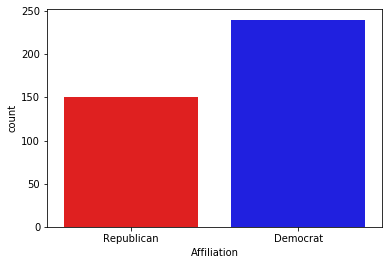

In [6]:
_ = sns.countplot(data=speeches, x = 'Affiliation', palette=['r', 'b'])

In [7]:
speeches['Word Count']

0      3289
1      7127
2       280
3      4889
4      4476
       ... 
386    5064
387    6999
388    1045
389    2327
390    1598
Name: Word Count, Length: 391, dtype: int64

In [8]:
dem_count = sum(speeches[speeches['Affiliation'] == 'Democrat']['Word Count'])
rep_count = sum(speeches[speeches['Affiliation'] == 'Republican']['Word Count'])

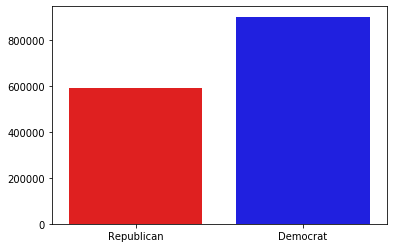

In [9]:
_ = sns.barplot(y =[rep_count, dem_count], x=['Republican', 'Democrat'], palette=['r', 'b'])

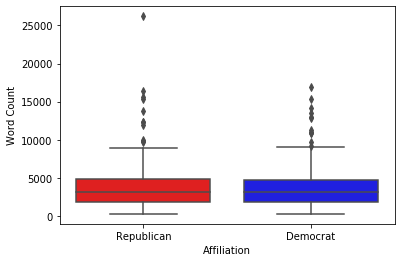

In [10]:
# Distribution of Words-per-speech counts per affiliation
_ = sns.boxplot(x='Affiliation', y="Word Count",
                 data=speeches, palette=['r', 'b'])

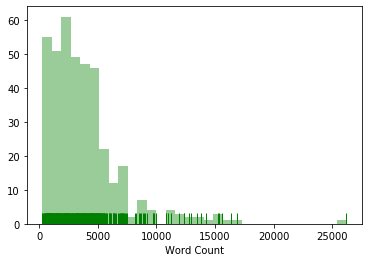

In [11]:
_ = sns.distplot(speeches['Word Count'], rug=True, kde=False, color='g')


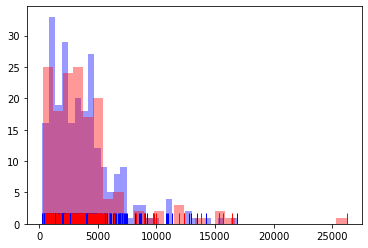

In [12]:
dem_wc = speeches[speeches['Affiliation'] == 'Democrat']
rep_wc = speeches[speeches['Affiliation'] == 'Republican']

sns.distplot(dem_wc[['Word Count']], rug=True, color='b', kde=False, bins=30)
sns.distplot(rep_wc[['Word Count']], rug=True, color='r', kde=False, bins=30)
# sns.distplot(speeches['Word Count'], rug=True, color='g', kde=False)

In [13]:
dem_wc.describe()

,Word Count,Label
count,240.000000,240.0
mean,3758.712500,1.0
std,2850.335766,0.0
min,246.000000,1.0
25%,1782.250000,1.0
50%,3178.000000,1.0
75%,4720.750000,1.0
max,16890.000000,1.0


In [14]:
rep_wc.describe()

,Word Count,Label
count,151.000000,151.0
mean,3907.324503,0.0
std,3523.849190,0.0
min,280.000000,0.0
25%,1753.500000,0.0
50%,3158.000000,0.0
75%,4857.000000,0.0
max,26215.000000,0.0


In [15]:
speeches.describe()

,Word Count,Label
count,391.000000,391.000000
mean,3816.104859,0.613811
std,3124.103529,0.487499
min,246.000000,0.000000
25%,1753.500000,0.000000
50%,3177.000000,1.000000
75%,4804.500000,1.000000
max,26215.000000,1.000000


Median of 3K words per speech, mean is 3600 but std is 2890, pretty large (so median is more significative)
Pretty large outliers

In [22]:
In [4]: pd.options.display.max_colwidth = None

speeches[(speeches['Word Count'] > 26000)].Transcript


111    president thank administration possible help community foot speak governor representative fema way soon hear word fema know great job fema s special want warm condolence way s tough deal bad bed level bad group s high bad grouping tornado s incredible power horrible destructive power america continue critical progress war virus weekend number daily new infection remain flat nationwide flat hospitalizations slow hotspot like new york new jersey michigan louisiana clear evidence aggressive strategy combat virus work americans follow guideline s incredible ve look chart chart model early prediction 100 thousand 120 000 people look like unfortunately perish hopefully way way number sign people thing right s horrible thing world eighty country tribute wonderful healthcare advisor expert right beginning appreciate fact dr fauci maybe ask tony word thank tony dr fauci thank mr president couple thing want comment happen yesterday hear dr birx soon number ve talk thing start balance thin

In [23]:
speeches['Transcript'][0]

'34th time speak oval office year soon time want share thought save long time honor life president write past week thank nancy grateful opportunity serve thing presidency somewhat apart spend lot time fast car drive people tint glass parent hold child wave late return time want stop reach glass connect maybe little tonight people ask feel leave fact sweet sorrow sweet california ranch freedom sorrow goodbye course leave beautiful place know hall stair office white house president family live favorite window like stand look early morning view ground washington monument mall jefferson memorial morning humidity low past jefferson river potomac virginia shore view lincoln smoke rise battle bull run prosaic thing grass bank morning traffic people way work sailboat river think bit window reflect past year mean mean image come mind like refrain nautical small story big ship refugee sailor early 80 height boat people sailor hard work carrier midway patrol south china sea sailor like american s

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

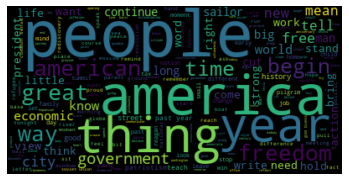

In [62]:
text = speeches.Transcript[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

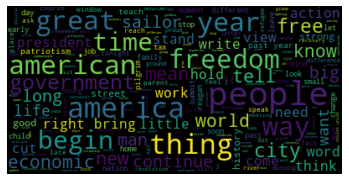

In [67]:

# Display the generated image:
# the matplotlib way:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [64]:
dem_speeches = speeches[speeches['Affiliation'] == 'Democrat']
rep_speeches = speeches[speeches['Affiliation'] == 'Republican']

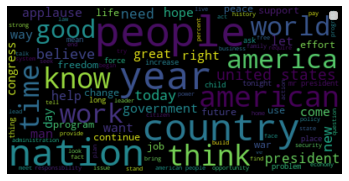

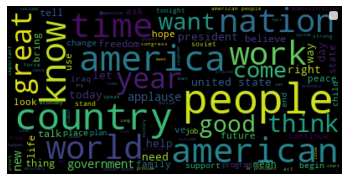

In [65]:
for s in [dem_speeches, rep_speeches]:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(s.Transcript.tolist()))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.legend(s.Affiliation.sample())
    plt.show()

In [66]:
dem_speeches.Transcript.str.split(expand=True).stack().value_counts().to_frame().iloc[0:20]

,0
people,3999
year,3421
president,3113
world,2481
work,2246
country,2218
good,2139
time,2138
nation,2134
new,2097


In [68]:
rep_speeches.Transcript.str.split(expand=True).stack().value_counts().to_frame().iloc[0:20]

,0
people,2845
president,2281
s,2067
year,1787
know,1667
world,1615
country,1578
america,1470
time,1463
work,1415
